In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ingeniería de características
### Exploración de datos

In [536]:
dataset = pd.read_csv("data/dataset_pishing.csv")

In [537]:
dataset.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [538]:
dataset.describe()

,url,status
count,11430,11430
unique,11429,2
top,http://e710z0ear.du.r.appspot.com/c:/users/use...,legitimate
freq,2,5715


In [539]:
dataset["status"].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

### Derivación de características

1. ¿Qué ventajas tiene el análisis de una URL contra el análisis de otros datos, cómo el tiempo de vida del dominio, o las características de la página Web?
   1. Las ventajas de este tipo de análisis son principalmente en cuanto a la rapidez y eficiencia, ya que las URL son datos que se pueden obtener de manera rápida y sencilla, además de que son datos que se pueden obtener de manera masiva, lo que permite tener un dataset con una gran cantidad de datos para entrenar un modelo. Por otro lado, el análisis de otras características como el tiempo de vida del dominio o las características de la página Web, son datos que se pueden obtener de manera más complicada y que no se pueden obtener de manera masiva, lo que limita la cantidad de datos que se pueden obtener para entrenar un modelo.
2. ¿Qué características de una URL son más prometedoras para la detección de phishing?
   1. Entre las características más importantes se pueden mencionar: la longitud de la URL, la presencia de caracteres especiales, la cantidad de subdominios, palabras clave en la URL, la presencia de HTTPS, la presencia de un certificado SSL, entre muchas otras posibles características que podrían delatar a un sitio de phishing.
3. En base a la respuesta anterior escriba al menos quince funciones basadas en los artículos, para derivar características que un modelo pueda utilizar y añada dichas características al dataset original. Incluya dentro de las quince funciones, la entropía de Shanon y relativa.

In [540]:
from collections import Counter
from scipy.stats import entropy

In [541]:
def shannon_entropy(url: str) -> float:
    """Calcula la entropía de Shannon de una cadena dada."""
    counts = Counter(url)
    probs = [freq / len(url) for freq in counts.values()]
    return -sum(p * np.log2(p) for p in probs)

In [542]:
def relative_entropy(url: str) -> float:
    """Calcula la entropía relativa de una URL con base en la distribución uniforme."""
    counts = Counter(url)
    probs = np.array([freq / len(url) for freq in counts.values()])
    uniform_probs = np.ones(len(probs)) / len(probs)
    return entropy(probs, uniform_probs, base=2)


In [543]:
def url_length(url):
    """Longitud total de la URL"""
    return len(url)

In [544]:
from urllib.parse import urlparse
def domain_length(url):
    """Longitud del dominio"""
    parsed_url = urlparse(url)
    return len(parsed_url.netloc)

In [545]:
import re 
def count_special_chars(url):
    """Cantidad de caracteres especiales en la URL"""
    return len(re.findall(r"[@_-]", url))

In [546]:
def count_digits(url):
    """Cantidad de números en la URL"""
    return sum(c.isdigit() for c in url)

In [547]:
def count_subdomains(url):
    """Número de subdominios en la URL"""
    parsed_url = urlparse(url)
    return parsed_url.netloc.count('.')

In [548]:
def contains_ip_address(url):
    """Verifica si la URL contiene una dirección IP en lugar de un dominio"""
    contains = bool(re.match(r'^(?:\d{1,3}\.){3}\d{1,3}', urlparse(url).netloc))

    # True -> 1, False -> 0
    return int(contains)

In [549]:
def count_hyphens(url):
    """Cantidad de guiones en la URL"""
    return url.count('-')

In [550]:
def count_question_mark(url):
    """Cantidad de signos de interrogación en la URL"""
    return url.count('?')

In [551]:
def count_double_slash(url):
    """Cantidad de doble slash en la URL"""
    return url.count('//')

In [552]:
def contains_suspicious_words(url):
    """Verifica si la URL contiene palabras clave sospechosas"""
    suspicious_words = ['secure', 'account', 'update', 'login', 'banking', 'verify', 'free', 'password']
    return sum(word in url.lower() for word in suspicious_words)

In [553]:
def count_top_level_domain(url):
    """Número de dominios de nivel superior en la URL"""
    tlds = ['.com', '.net', '.org', '.info', '.biz', '.gov', '.edu']
    return sum(url.endswith(tld) for tld in tlds)

In [554]:
def count_https(url):
    """Verifica si la URL usa HTTPS (segura) o HTTP (insegura)"""
    return 1 if urlparse(url).scheme == 'https' else 0

In [555]:
def count_repeated_chars(url):
    """Cuenta la cantidad de caracteres repetidos consecutivamente en la URL"""
    return sum(1 for i in range(len(url) - 1) if url[i] == url[i + 1])

In [556]:
dataset_features = dataset.copy()

dataset_features['shannon_entropy'] = dataset_features['url'].apply(shannon_entropy)
dataset_features['relative_entropy'] = dataset_features['url'].apply(relative_entropy)
dataset_features['url_length'] = dataset_features['url'].apply(url_length)
dataset_features['domain_length'] = dataset_features['url'].apply(domain_length)
dataset_features['special_chars'] = dataset_features['url'].apply(count_special_chars)
dataset_features['digits'] = dataset_features['url'].apply(count_digits)
dataset_features['subdomains'] = dataset_features['url'].apply(count_subdomains)
dataset_features['ip_address'] = dataset_features['url'].apply(contains_ip_address)
dataset_features['hyphens'] = dataset_features['url'].apply(count_hyphens)
dataset_features['question_mark'] = dataset_features['url'].apply(count_question_mark)
dataset_features['double_slash'] = dataset_features['url'].apply(count_double_slash)
dataset_features['suspicious_words'] = dataset_features['url'].apply(contains_suspicious_words)
dataset_features['top_level_domain'] = dataset_features['url'].apply(count_top_level_domain)
dataset_features['https'] = dataset_features['url'].apply(count_https)
dataset_features['repeated_chars'] = dataset_features['url'].apply(count_repeated_chars)

dataset_features.head()

,url,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,ip_address,hyphens,question_mark,double_slash,suspicious_words,top_level_domain,https,repeated_chars
0,http://www.crestonwood.com/router.php,legitimate,3.787043,0.212957,37,19,0,0,2,0,0,0,1,0,0,0,5
1,http://shadetreetechnology.com/V4/validation/a...,phishing,4.419864,0.438117,77,23,0,17,1,0,0,0,1,0,0,0,5
2,https://support-appleld.com.secureupdate.duila...,phishing,4.753412,0.290982,126,50,3,19,4,0,1,1,1,2,0,1,4
3,http://rgipt.ac.in,legitimate,3.461320,0.123642,18,11,0,0,2,0,0,0,1,0,0,0,2
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,4.097662,0.224266,55,15,2,0,2,0,2,0,1,0,0,0,4


### Preprocesamiento

In [557]:
dataset_features = dataset_features.drop(columns=['url'])

In [558]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# Legitimo = 1, Phishing = 0
status_encoded = encoder.fit_transform(dataset_features[["status"]]).toarray()

dataset_features["status"] = status_encoded

In [559]:
dataset_features.head()

,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,ip_address,hyphens,question_mark,double_slash,suspicious_words,top_level_domain,https,repeated_chars
0,1.0,3.787043,0.212957,37,19,0,0,2,0,0,0,1,0,0,0,5
1,0.0,4.419864,0.438117,77,23,0,17,1,0,0,0,1,0,0,0,5
2,0.0,4.753412,0.290982,126,50,3,19,4,0,1,1,1,2,0,1,4
3,1.0,3.461320,0.123642,18,11,0,0,2,0,0,0,1,0,0,0,2
4,1.0,4.097662,0.224266,55,15,2,0,2,0,2,0,1,0,0,0,4


In [560]:
dataset_features.dtypes

status              float64
shannon_entropy     float64
relative_entropy    float64
url_length            int64
domain_length         int64
special_chars         int64
digits                int64
subdomains            int64
ip_address            int64
hyphens               int64
question_mark         int64
double_slash          int64
suspicious_words      int64
top_level_domain      int64
https                 int64
repeated_chars        int64
dtype: object

In [561]:
dataset_features.isna().sum()

status              0
shannon_entropy     0
relative_entropy    0
url_length          0
domain_length       0
special_chars       0
digits              0
subdomains          0
ip_address          0
hyphens             0
question_mark       0
double_slash        0
suspicious_words    0
top_level_domain    0
https               0
repeated_chars      0
dtype: int64

In [562]:
dataset_features.shape

(11430, 16)

### Selección de características

#### Eliminación de columnas con varianza baja

In [563]:
from sklearn.feature_selection import VarianceThreshold

# Eliminar características con varianza cero
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(dataset_features.select_dtypes(include=[np.number]))
dataset_features = dataset_features.loc[:, constant_filter.get_support()]

dataset_features

,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,ip_address,hyphens,question_mark,double_slash,suspicious_words,top_level_domain,https,repeated_chars
0,1.0,3.787043,0.212957,37,19,0,0,2,0,0,0,1,0,0,0,5
1,0.0,4.419864,0.438117,77,23,0,17,1,0,0,0,1,0,0,0,5
2,0.0,4.753412,0.290982,126,50,3,19,4,0,1,1,1,2,0,1,4
3,1.0,3.461320,0.123642,18,11,0,0,2,0,0,0,1,0,0,0,2
4,1.0,4.097662,0.224266,55,15,2,0,2,0,2,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1.0,4.119088,0.273230,45,17,0,0,2,0,0,0,1,0,0,0,5
11426,0.0,4.938590,0.346813,84,18,1,2,2,0,0,1,1,1,1,0,4
11427,1.0,4.987577,0.369975,105,16,7,15,2,0,6,1,1,0,0,1,6
11428,1.0,4.214132,0.178185,38,30,0,0,2,0,0,0,1,0,0,0,4


#### Correlación de columnas con la variable objetivo

In [564]:
# 2. Calcular la correlación con la variable objetivo 'status'
numeric_df = dataset_features.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_target = correlation_matrix["status"].abs().sort_values(ascending=False)
print("\nCorrelación con 'status':\n", correlation_target)


Correlación con 'status':
 status              1.000000
shannon_entropy     0.336562
suspicious_words    0.297465
question_mark       0.294319
url_length          0.248482
digits              0.240425
domain_length       0.238516
relative_entropy    0.229560
https               0.114669
subdomains          0.102622
hyphens             0.100107
ip_address          0.092515
top_level_domain    0.084470
repeated_chars      0.062190
double_slash        0.061499
special_chars       0.060224
Name: status, dtype: float64


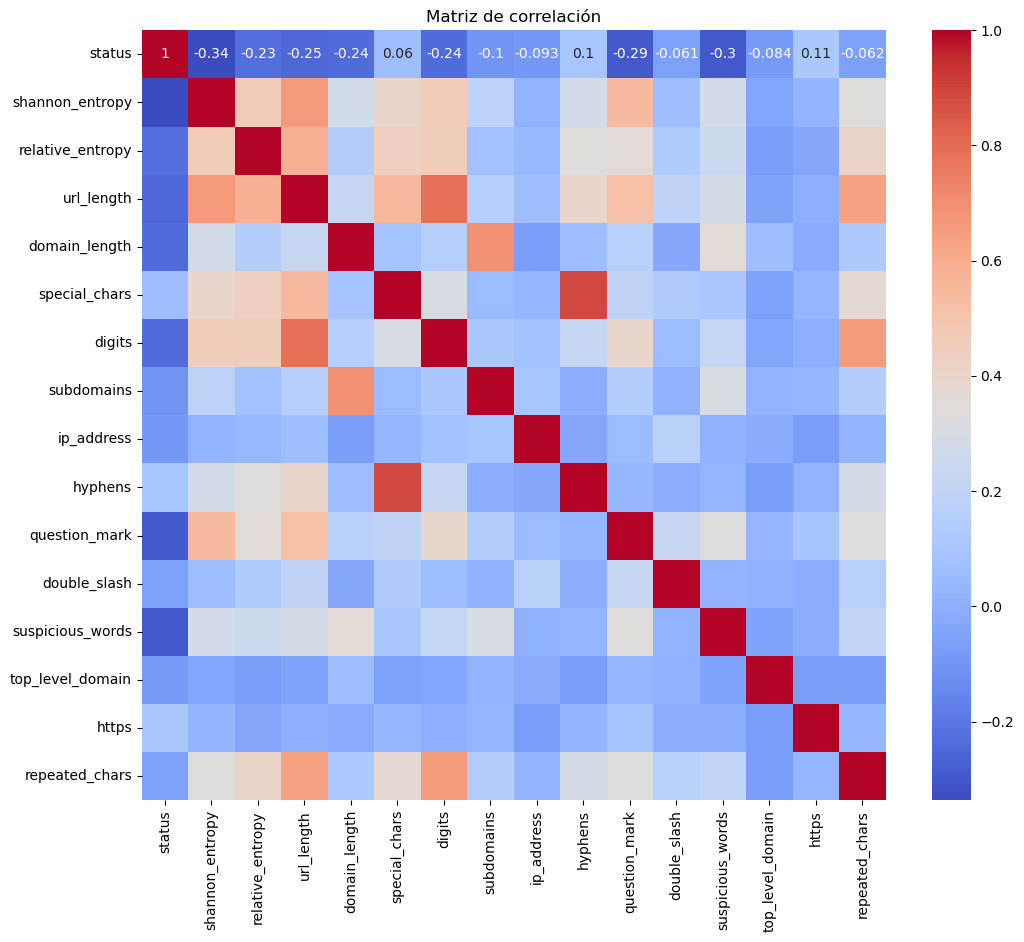

In [565]:
#visualizar matriz de correlacion 
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


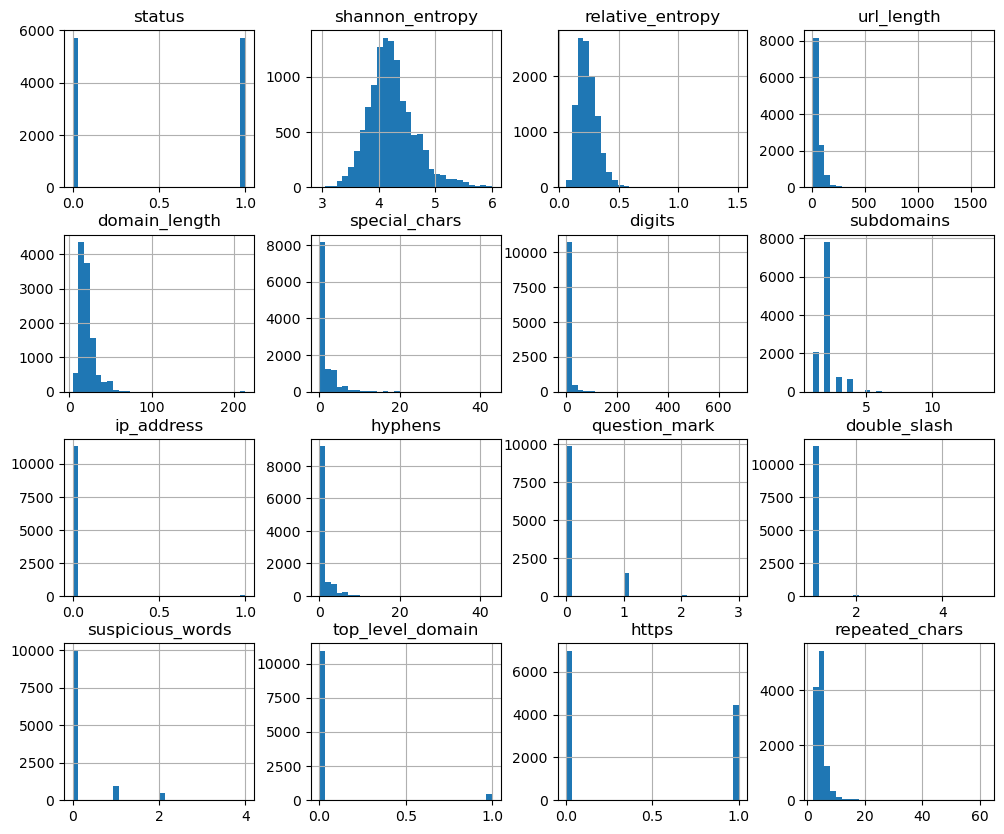

In [566]:
dataset_features.hist(figsize=(12, 10), bins=30)
plt.show()


#### Elección de características con Random Forest

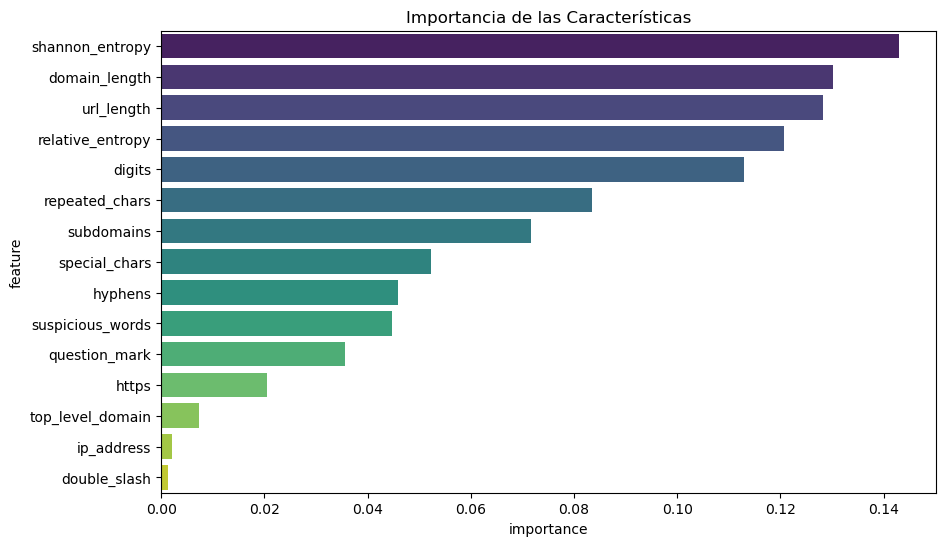

In [567]:
from sklearn.ensemble import RandomForestClassifier

X = dataset_features.drop(columns=['status'])
y = dataset_features['status']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Crear un dataframe con la importancia de características
importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
importances = importances.sort_values(by='importance', ascending=False)

# Visualizar la importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title("Importancia de las Características")
plt.show()


In [568]:
dataset_features.drop(columns=['ip_address', 'double_slash', 'top_level_domain'], inplace=True)

In [569]:
dataset_features.head()

,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,hyphens,question_mark,suspicious_words,https,repeated_chars
0,1.0,3.787043,0.212957,37,19,0,0,2,0,0,0,0,5
1,0.0,4.419864,0.438117,77,23,0,17,1,0,0,0,0,5
2,0.0,4.753412,0.290982,126,50,3,19,4,1,1,2,1,4
3,1.0,3.461320,0.123642,18,11,0,0,2,0,0,0,0,2
4,1.0,4.097662,0.224266,55,15,2,0,2,2,0,0,0,4


### Columnas eliminadas

En base al análisis realizado por la implementación de random forest se determinó eliminar las siguientes 3 columnas:

- top level domain
- ip address
- double slash 

Esto es debido a que estas tres variables no son relevantes para determinar si un URL es malicioso o no

## Parte 2 - Implementación

In [570]:
from sklearn.model_selection import train_test_split

X = dataset_features.drop("status", axis=1)
y = dataset_features["status"]

# 55% entrenamiento, 15% validación, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=2/3, random_state=42)

print(f"Entremaniento: {X_train.shape}")
print(f"Validación: {X_val.shape}")
print(f"Test: {X_test.shape}")

Entremaniento: (1714, 12)
Validación: (3430, 12)
Test: (5144, 12)


In [571]:
X_train.to_csv("data/x_train.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)

X_val.to_csv("data/x_val.csv", index=False)
y_val.to_csv("data/y_val.csv", index=False)

X_test.to_csv("data/x_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

## Red Neuronal

In [572]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [573]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [574]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.BinaryCrossentropy()
metrics = [keras.metrics.BinaryAccuracy(), keras.metrics.AUC()]
epocs = 100

In [575]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [576]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=epocs,
    batch_size=32,
    verbose=1
)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc_6: 0.5495 - binary_accuracy: 0.5329 - loss: 2.4440 - val_auc_6: 0.7904 - val_binary_accuracy: 0.6770 - val_loss: 0.5719
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.5712 - binary_accuracy: 0.5387 - loss: 1.1686 - val_auc_6: 0.7800 - val_binary_accuracy: 0.6939 - val_loss: 0.5886
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6252 - binary_accuracy: 0.5830 - loss: 0.8153 - val_auc_6: 0.7384 - val_binary_accuracy: 0.6458 - val_loss: 0.6288
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6743 - binary_accuracy: 0.6305 - loss: 0.6804 - val_auc_6: 0.7066 - val_binary_accuracy: 0.6746 - val_loss: 0.6305
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6899 - binary_accuracy: 0.6344 - loss: 0.6474 - val_auc_6: 0.8278 - val_binary_accuracy: 0.7111 - val_loss: 0.6014
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_6: 0.6774 - binary_accuracy: 0.6153 - loss: 0.6473 - val_a

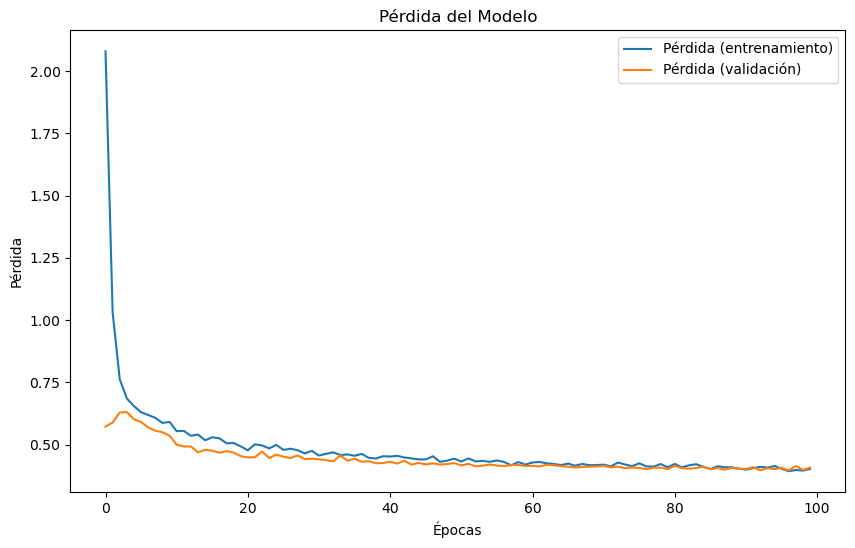

In [577]:
# gráfica de la pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

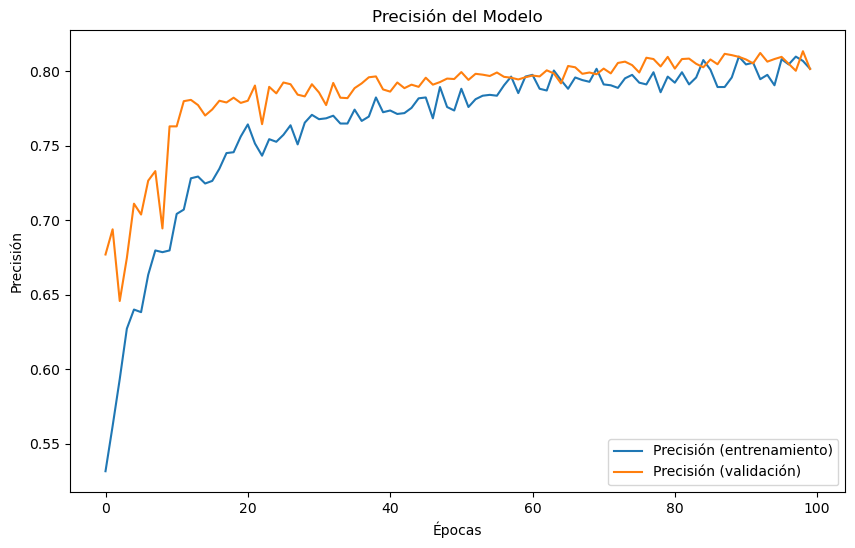

In [578]:
# gráfica de la precisión
plt.figure(figsize=(10, 6))
plt.plot(history.history['binary_accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_binary_accuracy'], label='Precisión (validación)')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [579]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


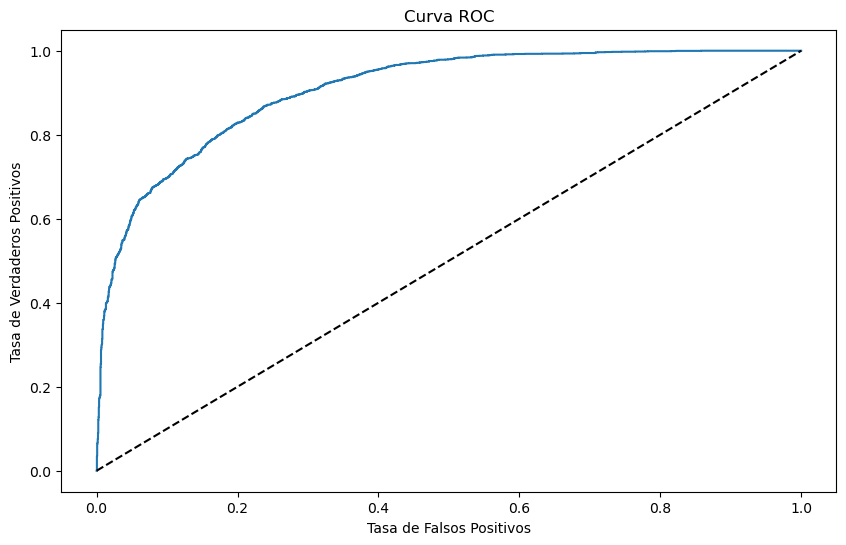

In [580]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

In [581]:
# AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc}")

AUC-ROC: 0.9067707971947463


In [582]:
# Validación del modelo
loss, accuracy, auc = model.evaluate(X_test, y_test, verbose=0)

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


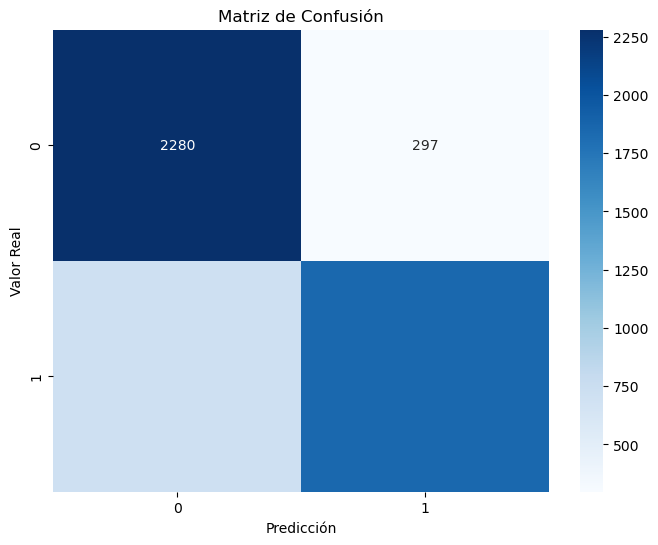

In [583]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [584]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82      2577
         1.0       0.86      0.72      0.79      2567

    accuracy                           0.80      5144
   macro avg       0.81      0.80      0.80      5144
weighted avg       0.81      0.80      0.80      5144



## Random Forest 

In [585]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_med_prob = model.predict_proba(X_test)[:, 1]


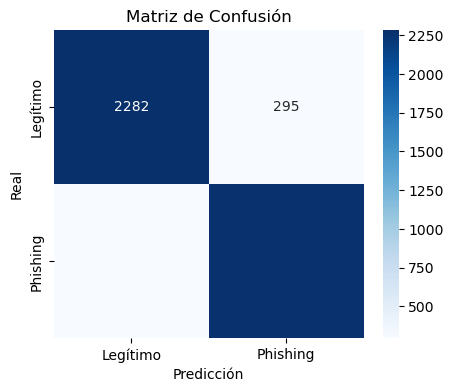

In [586]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítimo", "Phishing"], yticklabels=["Legítimo", "Phishing"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [587]:
#perdida de modelo 
from sklearn.metrics import log_loss
loss = log_loss(y_test, y_med_prob)
print(f"Pérdida de modelo: {loss}")


Pérdida de modelo: 0.2895996477022471


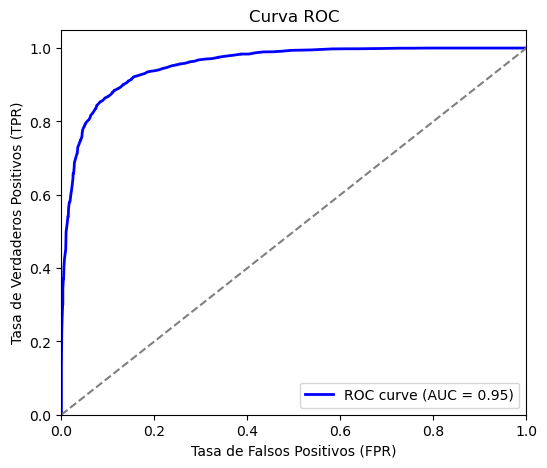

In [588]:

fpr, tpr, _ = roc_curve(y_test, y_med_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [589]:
print("\nAUC Score:", roc_auc)


AUC Score: 0.954746061281369


In [590]:
print ("Accuracy: ", accuracy_score(y_test, y_pred))
print ("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8851088646967341

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2577
         1.0       0.89      0.88      0.88      2567

    accuracy                           0.89      5144
   macro avg       0.89      0.89      0.89      5144
weighted avg       0.89      0.89      0.89      5144



# Discusión

1. ¿Cuál es el impacto de clasificar un sitio legítimo como phishing?
   1. Uno de los principales problemas de clasificar un sitio legítimo como phishing es que puede afectar a la reputación de un sitio, por causar desconfianza en sus usuarios potenciales, lo que puede llevar a una disminución en el tráfico del sitio. Además, si un sitio legítimo es clasificado como phishing, puede ser bloqueado por los navegadores, lo que puede llevar a una disminución en el tráfico del sitio.
2. ¿Cuál es el impacto de clasificar un sitio de phishing como legítimo?
   1. La importancia recae en que pone en riesgo la seguridad de los usuarios finales, esto se puede exponer en diferentes riesgos como robo de credenciales y datos personales, fraude financiero, una infección por malware y muchas repercuciones más
3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares de clasificación de phishing?
   1. Una de las métricas que mejor se adptan a los casos de uso de un modelo de clasificación de phishing es el F1 score, ya que esta métrica toma en cuenta tanto los falsos positivos como los falsos negativos, lo que permite tener una visión más completa del rendimiento del modelo, por otro lado la precisión ayuda a exponer los falsos positivos y el recall los falsos negativos. Estas tres métricas consideramos que son esenciales para evaluar el rendimiento de un modelo de clasificación de phishing.
4. ¿Qué modelo funcionó mejor para la clasificación de phishing? ¿Por qué?
   1. El modelo que mostró mejores resultados fue el de Random Forest, esto es debido a que este modelo se desempeña mejor en el caso de que los datos expuestos sean estructurados y tabulares, tales somo las variables que utilizamos (longitud de URL, entropía, etc). Además Random Forest esta basado en un conjunto de árboles de de
5. Una empresa desea utilizar su mejor modelo, debido a que sus empleados sufren constantes ataques de phishing mediante e-mail. La empresa estima que, de un total de 50,000 emails, un 15% son phishing. 
   1. ¿Qué cantidad de alarmas generaría su modelo? ¿Cuántas positivas y cuantas negativas?
      1. Suponiendo que utilizamos la versión de Random Forest, con una precisión del 89% y un recall del 89% según nuestros resultados, el modelo generaría 6,675 verdaderos positivos (sitios fishing clasificados como fishing) y 825 falsos positivos (sitios legítimos clasificados como phishing), lo que daría un total de 7,500 alarmas. Además, de los 42,500 correos legítimos, el modelo generaría 825 falsos negativos (sitios de phishing clasificados como legítimos).
   2. ¿Funciona el modelo para el BR propuesto? En caso negativo, ¿qué propone para reducir la cantidad de falsas alarmas?
      1. Consideramos que nuestro modelo funciona de una manera adecuada para el BR propuesto, ya que el modelo tiene una precisión y recall del 89%, lo que nos permite tener un modelo con un buen rendimiento. Sin embargo, la cantidad de 825 falsos positivos es un número considerable dependiendo la capacidad de la empresa para gestionarlos. Para reducir la cantidad de falsas alarmas, se podría considerar aumentar la cantidad de características analizadas. Con más características es posible encontrar nuevas variables que permitan mejorar el rendimiento de los modelos. Además, se podría considerar la utilización de un modelo de ensamble, que combine varios modelos para mejorar el rendimiento del modelo a cambio de un costo computacional mayor.